https://sejaumdatascientist.com/como-criar-um-programa-de-fidelidade-para-empresa/

# Cicle

### Cicle 01
- Foundout 3 potencial clusters using the data as it is.

Next cicles:
- Need to make some feature engineering
- Deal with NA values
- Run others clustering algorithms

### Cicle 02
- Data is still messy. Got a similar cluster as cicle 01.
- Dealt with NA values
- Have runned other clustering algorithms to find a optimal cluster

Next cicles:
- Need to make some feature engineering

### Cicle 03
- Created 3 clusters and the average gross revenue adjusted seems to be more acurate then the previous circle.
- The data have been separeted in "good return", "qtd adjustment", "free purchase" and "normal purchase". It was possible to identify strange information in the data and it was treated creating new features.

Next cicles:
- Futher investigation on description / stock_code to "break" the hude cluster
- Data of purchase need to be analyzed to create new features
- The last cicles indicated some anomaly with customer with 0 or negative total purchase adjusted. Since we are not interested in this behaviour, we are going to remove it.

### Cicle 04
- This cicles we explored the "describe" columns with several features counting the frequency of each word.
- It was possible to create a cluster with most of people spending in avg $157.460,93 with 6 customers. But it didn´t capture the most speding customers, because there are a few in other clusters.

Next cicles:
- Data of purchase need to be analyzed to create new features
- Make a analyzis on the space using PCA or UMAP.

### Cicle 05
- "Date" feature has been developed creating new features.

Next cicles:
- Make a analyzis on the space using PCA or UMAP.

### Cicle 06
- Before making analyzis with PCA or UMAP, it was given another analyzies with "description" feature, since the counting frequency didn´t clustered similar words.
- It was taken 4 approuches, where it was choosen the one TDIF VECTORIZER + KMEANS CLUSTERING

Next cicles:
- Make a analyzis on the space using PCA or UMAP.

### Cicle 07
- After using PCA, UMAP, t-SNES and tree based embdeding, the last choice had a better performance since the we put the target value to reduce the number of features.
- Clustering the 'description' feature it doesn´t seem to be effective.
- However, both clustering (cicle 6 and 7) elect customers with a long stay period and it is necessary to view if this customers are currently buying creating new features.

Next cicles:
- Make new features to make the clusters better to predict "insiders".

# 0.0. Planejamento da Solução ( IOT )

## Input - Entrada

### O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

## Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - **Alto Ticket Médio**
                + média dos preços pagos
            - **Alto LTV (life time value)**
                + quanto foi gasto na empresa
            - **Baixa Recência ou Alta Frequência**
                + tempo entre as compras - contado em dias
            - **Alto Basket Size**
                + quantidade média de produtos comprados
            - **Baixa probabilidade de Churn**
                + encerramento de contrato ou baixa da relação com a empresa
            - **Previsão alta de LTV**
            - **Alta propensão de compra**

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País / Localização
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Atributos da clusterização / Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Análise de Cohort (marcação do grupo e seu comportamento ao longo do tempo)
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ? (1 mês, 3 meses...?)
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# 0.0. Imports

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import sklearn
import yellowbrick
import umap.umap_ as umap
from datetime import datetime
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport

import nltk
from nltk.tokenize import RegexpTokenizer

from IPython.core.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from sklearn import ensemble      as en
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from plotly import express as px

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

def describe_num(num_attributes):
    a = num_attributes.describe().T.reset_index()
    
    d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T      
    d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis())).T
    d7 = pd.DataFrame(num_attributes.apply( lambda x: x.unique().shape[0])).T
    
    n = pd.concat([d4, d5, d6, d7], axis=0).T.reset_index()
    n.columns = ['attibutes', 'range', 'skew', 'kurtosis', 'unique']
    b = a.merge(n, right_on='attibutes', left_on='index')
    b.drop('index', axis=1, inplace=True)
    columns = ['attibutes', 'count', 'mean', 'std', '25%', '50%', '75%', 'min', 'max', 'range',
           'skew', 'kurtosis', 'unique']
    return b[columns]

pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load dataset

In [3]:
# load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv',encoding='unicode_escape')

# drop extra columns
df_raw.drop('Unnamed: 8', axis=1, inplace=True)

# <font color='red'> 1.0. Descrição dos dados </font>

In [4]:
df1 = df_raw.copy()
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## 1.1. Rename columuns

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# storing columns names
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

# transforming to underscore the names and put into lowcase
snakecase = lambda x: inflection.underscore( x )

# creating a list with a new snakecase columns name and indicating the new one
cols_new = list( map( snakecase, cols_old ) )

#renaming columns name
df1.columns = cols_new

## 1.2. Data dimensions

In [6]:
df1.shape

(541909, 8)

## 1.3. Data types

In [6]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

## 1.4. Check NA

In [7]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

### 1.5.1 Description

In [7]:
# replace with existing description by stock_code
df1aux = df1[~df1['description'].isna()]
aux3 = df1aux[['stock_code', 'description']].drop_duplicates('stock_code')
df1 = df1.drop(columns='description')
df1_ = pd.merge(df1, aux3, how='left', on='stock_code')
df1_.isna().sum()

invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
description        112
dtype: int64

In [8]:
# the remaing 112 records have 0 values for unit_price. it is going to bel erased
df1_ = df1_.dropna(subset=['description'])

df1 = df1_.copy()

df1_.isna().sum()

invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
customer_id     134968
country              0
description          0
dtype: int64

### 1.5.2 Customer ID 

In [9]:
df1['customer_id'].isna().sum()/df1.shape[0]

0.24911175218762746

In [10]:
aux_na = df1[df1['customer_id'].isna()].copy()
aux_na['gross_revenue_na'] = aux_na['unit_price']*aux_na['quantity']
print("Total Gross Revenue NA $ %.2f" % aux_na['gross_revenue_na'].sum())
aux = df1[~df1['customer_id'].isna()].copy()
aux['gross_revenue_na'] = aux['unit_price']*aux['quantity']
print("Total Gross Revenue $ %.2f" % aux['gross_revenue_na'].sum())
print("Percentage of Total (not NA): %.2f" % (aux_na['gross_revenue_na'].sum()/aux['gross_revenue_na'].sum()*100), '%')

Total Gross Revenue NA $ 1447682.12
Total Gross Revenue $ 8300065.81
Percentage of Total (not NA): 17.44 %


In [11]:
df1_ = df1.copy()
df1_.shape

(541797, 8)

In [12]:
# create reference - artificial customer to not drop the records
df_backup = pd.DataFrame( aux_na['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 30000, 30000+len( df_backup ), 1) 

# merge original with reference dataframe
df1_ = pd.merge( df1_, df_backup, on='invoice_no', how='left' )

# coalesce (command from SQL)
df1_['customer_id'] = df1_['customer_id_x'].combine_first( df1_['customer_id_y'] )

# drop extra columns
df1_ = df1_.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [13]:
df1 = df1_.copy()
df1_.isna().sum()

invoice_no      0
stock_code      0
quantity        0
invoice_date    0
unit_price      0
country         0
description     0
customer_id     0
dtype: int64

## 1.6. Change dtypes

In [14]:
# customer_id
df1['customer_id'] = df1['customer_id'].astype('int32')
df1['quantity'] = df1['quantity'].astype('int32')
df1.dtypes

invoice_no              object
stock_code              object
quantity                 int32
invoice_date    datetime64[ns]
unit_price             float64
country                 object
description             object
customer_id              int32
dtype: object

## 1.7. Descriptive Statistics

In [16]:
num_attributes = df1.select_dtypes(include=['int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int32', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attibutes

In [17]:
describe_num(num_attributes)

,attibutes,count,mean,std,25%,50%,75%,min,max,range,skew,kurtosis,unique
0,quantity,541797.0,9.555919,218.103428,1.00,3.00,10.00,-80995.00,80995.0,161990.00,-0.264100,119744.998246,722.0
1,unit_price,541797.0,4.612067,96.769831,1.25,2.08,4.13,-11062.06,38970.0,50032.06,186.487799,58993.571524,1630.0
2,customer_id,541797.0,19408.827880,7330.497961,14367.00,16245.00,18283.00,12346.00,33597.0,21251.00,1.041805,-0.681252,7970.0


**quantity** - There is some strange values in the max and min values. Need further investigation

**unit_price** - There is some product with price equals 0 and a max values of 38.970. Need further investigation

### 1.7.2. Categorical Attibutes

In [115]:
cat_attributes.apply( lambda x: x.unique().shape[0])

invoice_no     25788
stock_code      3958
country           38
description     3817
dtype: int64

# <font color='red'> 2.0. Feature Engineering </font>

In [15]:
df2 = df1.copy()
df2.columns

Index(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price',
       'country', 'description', 'customer_id'],
      dtype='object')

In [16]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,WHITE METAL LANTERN,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850


### 2.1. GROSS REVENUE

In [17]:
# gross revenue
df2['gross_revenue'] = df2['unit_price'] * df2['quantity']

### 2.2. GOOD RETURN

In [18]:
df2['good_return'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] > 0) else 0, axis=1)

### 2.3. QNTD ADJUSTMENT

In [19]:
df2['qtd_adjustment'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] == 0) else 0, axis=1)

### 2.4. FREE PURCHASE

In [20]:
df2['free_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] == 0) else 0, axis=1)

### 2.5. NORMAL PURCHASE

In [21]:
df2['normal_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] > 0) else 0, axis=1)

In [22]:
df2.sample(40)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,good_return,qtd_adjustment,free_purchase,normal_purchase
158739,550316,22748,12,2017-04-15,2.10,United Kingdom,POPPY'S PLAYHOUSE KITCHEN,16193,25.20,0,0,0,1
325565,565450,21365,12,2017-09-02,0.75,United Kingdom,MIRRORED WALL ART STARS,17722,9.00,0,0,0,1
14346,537534,22502,29,2016-12-05,0.00,United Kingdom,PICNIC BASKET WICKER SMALL,30091,0.00,0,0,1,0
338950,566577,21156,1,2017-09-11,4.13,United Kingdom,RETROSPOT CHILDRENS APRON,32585,4.13,0,0,0,1
133749,C547797,37449,-1,2017-03-23,9.95,United Kingdom,CERAMIC CAKE STAND + HANGING CAKES,17460,-9.95,1,0,0,0
229101,557019,22267,1,2017-06-14,0.39,United Kingdom,EASTER DECORATION EGG BUNNY,15907,0.39,0,0,0,1
438739,574336,23209,10,2017-11-02,1.65,Belgium,mailout,12397,16.50,0,0,0,1
19596,537871,21621,1,2016-12-06,8.50,United Kingdom,VINTAGE UNION JACK BUNTING,12748,8.50,0,0,0,1
538892,581425,22596,1,2017-12-06,0.39,United Kingdom,CHRISTMAS STAR WISH LIST CHALKBOARD,14796,0.39,0,0,0,1
449506,575138,21327,2,2017-11-06,2.46,United Kingdom,SKULLS WRITING SET,33208,4.92,0,0,0,1


# <font color='red'> 3.0. Filtragem de Variaveis </font>

In [22]:
df3 = df2.copy()
df3.columns

Index(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price',
       'country', 'description', 'customer_id', 'gross_revenue', 'good_return',
       'qtd_adjustment', 'free_purchase', 'normal_purchase'],
      dtype='object')

In [23]:
df3.shape

(541797, 13)

## 3.1. Row Filtering

In [24]:
# Qntd Adjustment - There is no reason to maintain this records in the data.
df3 = df3[df3['qtd_adjustment'] == 0]
df3.shape

(540558, 13)

## 3.2. Column Filtering

In [25]:
df3 = df3.drop(columns=['qtd_adjustment'])

In [37]:
#df3.to_csv('../data/C04_03.csv', index=False)

# <font color='red'> 4.0. EDA ( Exploratory Data Analysis ) </font>

In [196]:
df4 = df3.copy()
df4.shape

(540558, 12)

## 4.1. Analyzing by class

### 4.1.1. Normal Purchase

In [41]:
df4_np = df4[df4['normal_purchase'] == 1]

In [42]:
profile = ProfileReport( df4_np )
profile.to_file( 'normal_purchase_v1.html' )

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

* invoice_no - total of 19960 orders / invoice 573585 have 1114 itens in the basket (doubled compared to previous invoice), it is import to analyze how this basket is composed.

* stock_code - total of 3922 code / the most frequent is 85123A

* quantity - Maximum is strange with 80995 itens maybe it is a outlier. there is others with high vales we need to understand

* invoice_date - histogram have low sales frequency in the begining of year. sales era better close to Christimas.

* unit_price - the range of prices is a little bit awkward. need further investigation

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - mail out is the most frequent value. investigate if it is important to clustering.

In [196]:
len(df4_np['stock_code'].unique())

3922

### 4.1.2. Good Return

In [34]:
df4_gr = df4[df4['good_return'] == 1]

In [35]:
profile = ProfileReport( df4_gr )
profile.to_file( 'good_return.html' )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

* invoice_no - total of 3836 orders / C570878 have returned the most products (101 in total)

* stock_code - total of 1947 code / the most frequent is M (manual) and there other not products like D and S. Need to understand it is important.

* quantity - Minimum is strange with -80995 itens maybe it is a outlier. there is others with lower vales we need to understand

* invoice_date - most of returns had happened between september and november.

* unit_price - the range of prices is a little bit awkward. need further investigation

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - manual, postage, discount and sample have several quantity amount.

### 4.1.3. Free Purchase

In [36]:
df4_fp = df4[df4['free_purchase'] == 1]

In [37]:
profile = ProfileReport( df4_fp )
profile.to_file( 'free_purchase.html' )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

* invoice_no - total of 804 orders / 539856 have the most of free itens (64 in total)

* stock_code - total of 666 code / the most frequent is 23084 with 13 in total.

* quantity - Maximum is strange with 12540 itens maybe it is a outlier. there is others with lower vales we need to understand

* invoice_date - most of gift was given in july and in the end of year.

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - rabbit night light have the most given away. there is no a huge rule for this gift.

## 4.2. Feature Analysis

### 4.2.1. Stock Code

In [197]:
# products have a code + a digit (if this product have a variation). "Not product" have single character or other configuration.
df4['not_product'] = df4['stock_code'].apply(lambda x: 1 if re.search('\D{2,}', x) else 0)

In [198]:
text = df4[df4['not_product'] == 1]['description'].unique().tolist()
aux = df4[df4['description'].isin(text)]

In [199]:
# 1. Removing generated customers with no value for clustering
# there is a bunch of records we cannot attach to a regular customer (customer_id >=30000) directly. This records is going to be removed from the dataset since there is no use for it.
aux_nc = aux[aux['customer_id'] >= 30000]
a = aux_nc[['gross_revenue','stock_code']].groupby('stock_code').count().reset_index()
print('Total of records with stock_code not generated by regular customer: ', a['gross_revenue'].sum())
rm_index = aux_nc.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

# 2. Bank Charges
# there is a total of 12 records named with bank charges. It is not related to a purchase invoice and it is a single record for customer.
# Since it is not possible to assess the meaning and this information is irrevelant, this record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'BANK CHARGES')]

# 3. CRUK Comission
# there is a total of 16 records named with CRUK Comission. It is related only to the customer nº14096
# Since it is not possible to assess the meaning and this information is irrevelant, this record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'CRUK')]

# 3. DOT
# there is a total of 16 records named with DOT POSTAGE. It is related only to the customer nº14096
# Since this is a cost for this buyer, and it is not a product by it self, this record is going to be removed
df4 = df4[~(df4['stock_code'] == 'DOT')]

# 4. PADS
# there is a total of 4 records named with PADS.
# The price is very low for this product and it seems there is no use for it. This record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'PADS')]

# 5. POSTAL
# We are going to separate the cost of postal from gross revenue (1196)
# The specific records for this cost it is going to be removed from the main dataset (df4)
a = df4[df4['stock_code'] == 'POST']
df_postal = a[['invoice_no', 'gross_revenue']].groupby('invoice_no').sum().rename( columns={'gross_revenue': 'total_postal'}).reset_index()
rm_index = a.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

# DROP NOT_PRODUCT COLUMNS
df4 = df4.drop(columns='not_product')

Total of records with stock_code not generated by regular customer:  972


In [78]:
# Analyzing each stock_code which is not a product
#text = df4[df4['not_product'] == 1]['description'].unique().tolist()
#aux = df4[df4['description'].isin(text)]
#aux.sample(40)
#a = aux[['gross_revenue','stock_code']].groupby('stock_code').count().reset_index()
#a = pd.merge(a, aux[['stock_code', 'description']], on='stock_code', how='inner').drop_duplicates()
#a

### 4.2.2. Unit Price

#### FREE PRODUCT - QTD + / Unit Price = 0

In [200]:
# 1114 of "free product" are related to fake customers which we don´t have previous information
# only 39 records are related to existing customer (indicated on dataset). most of customer bought just once, so it seems there is no reason to keep this records with products with value "0"
#fp = df4[(df4['free_purchase']==1) & (df4['customer_id']<30000)]
#fp[['customer_id', 'invoice_no', 'free_purchase']].groupby(['customer_id', 'invoice_no']).count().cumsum()

a = df4[df4['free_purchase'] == 1]
rm_index = a.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]
df4 = df4.drop(columns='free_purchase')
df4.shape

(537189, 11)

#### GOOD RETURN - QTD - / Unit Price +

In [201]:
# There is 296 records with product return related to fake customers. Since we cannot identify or work with this information, we are going to delete it.
gr = df4[(df4['good_return']==1) & (df4['customer_id']>=30000)]
rm_index = gr.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

In [202]:
# the rest of returned product is related to a customer. we are going to sepate it from gross_revenue creating a new column 'total_returned'
df4['quantity'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['quantity'], axis=1)
df4['unit_price'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['unit_price'], axis=1)
df4['total_returned'] = df4.apply(lambda x: 0 if x['good_return']==0 else x['gross_revenue'], axis=1)
df4['gross_revenue'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['gross_revenue'], axis=1)
df4 = df4.drop('good_return', axis=1)

#### NORMAL PURCHASE - QTD + / Unit Price +

In [203]:
# Manually input values we are going to remove from 'gross_revenue' section. A new section called 'manual_p' is created.
df4['quantity'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['quantity'], axis=1)
df4['unit_price'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['unit_price'], axis=1)
df4['manual_p'] = df4.apply(lambda x: x['gross_revenue'] if x['description']=='Manual' else 0, axis=1)
df4['gross_revenue'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['gross_revenue'], axis=1)

# Moving 'Manual' which cancels with 'total_return'. The sum is going to be only returned products and excluding manual input error.
df4['manual_p'] = df4.apply(lambda x: x['total_returned'] if (x['description']=='Manual') & (x['total_returned']<0) else x['manual_p'], axis=1)
df4['total_returned'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['total_returned'], axis=1)

In [204]:
# 'Adjust bad debt' is related to 3 customers which don´t have purchase in this data base. we are going to remove it
abd = df4[df4['description'] == 'Adjust bad debt']
rm_index = abd.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]
df4 = df4.drop('normal_purchase', axis=1)

In [205]:
df4 = df4.reset_index().drop(columns='index')

In [206]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,total_returned,manual_p
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850,15.30,0.00,0.00
1,536365,71053,6,2016-11-29,3.39,United Kingdom,WHITE METAL LANTERN,17850,20.34,0.00,0.00
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850,22.00,0.00,0.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850,20.34,0.00,0.00
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850,20.34,0.00,0.00


In [207]:
len(df4['customer_id'].unique())

5771

### 4.2.3 Description - By Pricetag

In [208]:
df4['description'] = df4['description'].apply(lambda x: x.lower())

In [209]:
aux = df4[['description', 'unit_price']].drop_duplicates(subset='description')

In [210]:
aux.head()

,description,unit_price
0,white hanging heart t-light holder,2.55
1,white metal lantern,3.39
2,cream cupid hearts coat hanger,2.75
3,knitted union flag hot water bottle,3.39
4,red woolly hottie white heart.,3.39


In [63]:
# range1 - $0 to <$5 - 2973
# range2 - $5 to <$10 - 580
# range3 - $10 to <$50 - 220
# range4 - $50 to <$100 - 8
# range5 - >$100 - 6
#
len(aux[(aux['unit_price'] >= 100)]['description'])

6

In [211]:
aux['range_0_5'] = aux.apply(lambda x: 1 if x['unit_price'] < 5 else 0, axis=1)
aux['range_5_10'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 5) & (x['unit_price'] < 10) else 0, axis=1)
aux['range_10_50'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 10) & (x['unit_price'] < 50) else 0, axis=1)
aux['range_50_100'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 50) & (x['unit_price'] < 100) else 0, axis=1)
aux['range_100'] = aux.apply(lambda x: 1 if x['unit_price'] >= 100 else 0, axis=1)
aux = aux.drop('unit_price', axis=1)

In [212]:
df4_p = pd.merge(df4, aux, on='description', how='left')

In [214]:
df4_p.shape

(536890, 16)

In [215]:
#total values per range
df4_p['range_0_5'] = df4_p['range_0_5'] * df4_p['quantity']
df4_p['range_5_10'] = df4_p['range_5_10'] * df4_p['quantity']
df4_p['range_10_50'] = df4_p['range_10_50'] * df4_p['quantity']
df4_p['range_50_100'] = df4_p['range_50_100'] * df4_p['quantity']
df4_p['range_100'] = df4_p['range_100'] * df4_p['quantity']
df4_p.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,total_returned,manual_p,range_0_5,range_5_10,range_10_50,range_50_100,range_100
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,white hanging heart t-light holder,17850,15.30,0.00,0.00,6,0,0,0,0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,white metal lantern,17850,20.34,0.00,0.00,6,0,0,0,0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,cream cupid hearts coat hanger,17850,22.00,0.00,0.00,8,0,0,0,0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,knitted union flag hot water bottle,17850,20.34,0.00,0.00,6,0,0,0,0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,red woolly hottie white heart.,17850,20.34,0.00,0.00,6,0,0,0,0


### 4.2.4 Invoice Date

In [216]:
df4_ = df4_p.copy()

In [217]:
#quantity per month
df4_['m_16_12'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] < datetime.strptime('2017/01/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_01'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/01/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/02/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_02'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/02/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/03/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_03'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/03/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/04/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_04'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/04/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/05/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_05'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/05/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/06/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_06'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/06/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/07/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_07'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/07/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/08/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_08'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/08/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/09/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_09'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/09/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/10/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_10'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/10/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/11/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_11'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/11/01', '%Y/%m/%d')) & (x['invoice_date'] < datetime.strptime('2017/12/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_12'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= datetime.strptime('2017/12/01', '%Y/%m/%d')) else 0, axis=1)

df4_['m_16_12'] = df4_['m_16_12'] * df4_['quantity']
df4_['m_17_01'] = df4_['m_17_01'] * df4_['quantity']
df4_['m_17_02'] = df4_['m_17_02'] * df4_['quantity']
df4_['m_17_03'] = df4_['m_17_03'] * df4_['quantity']
df4_['m_17_04'] = df4_['m_17_04'] * df4_['quantity']
df4_['m_17_05'] = df4_['m_17_05'] * df4_['quantity']
df4_['m_17_06'] = df4_['m_17_06'] * df4_['quantity']
df4_['m_17_07'] = df4_['m_17_07'] * df4_['quantity']
df4_['m_17_08'] = df4_['m_17_08'] * df4_['quantity']
df4_['m_17_09'] = df4_['m_17_09'] * df4_['quantity']
df4_['m_17_10'] = df4_['m_17_10'] * df4_['quantity']
df4_['m_17_11'] = df4_['m_17_11'] * df4_['quantity']
df4_['m_17_12'] = df4_['m_17_12'] * df4_['quantity']

df4_ = df4_.drop(columns=['quantity', 'invoice_date', 'unit_price'])

In [218]:
df4_.head()

,invoice_no,stock_code,country,description,customer_id,gross_revenue,total_returned,manual_p,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12
0,536365,85123A,United Kingdom,white hanging heart t-light holder,17850,15.30,0.00,0.00,6,0,0,0,0,15.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,536365,71053,United Kingdom,white metal lantern,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,536365,84406B,United Kingdom,cream cupid hearts coat hanger,17850,22.00,0.00,0.00,8,0,0,0,0,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,536365,84029G,United Kingdom,knitted union flag hot water bottle,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,536365,84029E,United Kingdom,red woolly hottie white heart.,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [219]:
#taking min / max buying date by customer
date_min = df4[['customer_id', 'invoice_date']].groupby('customer_id').min().reset_index().rename(columns={'invoice_date': 'first_buy_date'})
date_max = df4[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index().rename(columns={'invoice_date': 'last_buy_date'})

#total buy adjusted - removing returned and manual values from the gross amount
aux2 = df4[['customer_id', 'gross_revenue', 'total_returned', 'manual_p']].copy()
aux2['gross_revenue_adj'] = aux2['gross_revenue'] + aux2['total_returned'] + aux2['manual_p']
total_buy_adj = aux2[['customer_id', 'gross_revenue_adj']].groupby('customer_id').sum().reset_index().rename(columns={'gross_revenue_adj': 'total_gross_revenue_adj'})

# buy frequency by customer
aux = df4[['customer_id', 'invoice_no']].drop_duplicates(subset='invoice_no')
buy_frequency = aux.groupby('customer_id').count().reset_index().rename(columns={'invoice_no': 'total_invoices'})

#joing the tables
df_date = pd.merge(date_min, date_max, on='customer_id', how='left')
df_date = pd.merge(df_date, buy_frequency, on='customer_id', how='left')
df_date = pd.merge(df_date, total_buy_adj, on='customer_id', how='left')

df_date['date_interval'] = df_date['last_buy_date'] - df_date['first_buy_date']
df_date['date_interval'] = df_date['date_interval'].apply(lambda x: x.days)
df_date['date_interval'] = df_date['date_interval'].apply(lambda x: 0 if x==0 else x)
df_date['buy_rate'] = df_date['date_interval'] / df_date['total_invoices']
df_date['customer_by_day'] = df_date['total_gross_revenue_adj'] / df_date['date_interval']
df_date.replace([np.inf, -np.inf], 0, inplace=True)
df_date = df_date.drop(columns=['first_buy_date', 'last_buy_date'])

In [76]:
df_date.sort_values('customer_by_day', ascending=False).head(30)

,customer_id,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
4259,18139,8,8393.22,1,0.12,8393.22
3428,16986,2,1873.20,1,0.50,1873.20
3798,17509,11,6100.74,6,0.55,1016.79
1702,14646,74,278466.02,353,4.77,788.86
4255,18133,2,715.50,1,0.50,715.50
4232,18102,62,256438.49,367,5.92,698.74
2483,15700,3,664.03,1,0.33,664.03
1880,14893,2,1237.85,2,1.00,618.93
2207,15332,4,1661.06,3,0.75,553.69
1299,14096,18,53147.98,97,5.39,547.92


In [220]:
df4 = df4_.copy()

### 4.2.5 Products with no meaning (previous cicles)

In [221]:
#All the products bellow do not have enough representative 
to_remove_code = ['M','m','23113','23114','23117','23115','23116','84968E','21275','20818','90159','84805B','35598C']

In [222]:
# dropping records do not have total of sum > 0
df4_=df4[~df4['stock_code'].isin(to_remove_code)]
df4_.shape

(536094, 26)

In [228]:
## inserting values to the new created columns
#for i in range(df4_.iloc[:, 12:813].shape[1]):
#    df4_.iloc[:, i+12] = df4_['unit_price_adj']*df4_['quantity']*df4_.iloc[:, i+12]

In [223]:
df4 = df4_.copy()

#### 4.3 FINAL DATASET

In [278]:
df4_ = df4.drop(columns=['stock_code', 'description', 'country', 'gross_revenue', 'total_returned', 'manual_p']).copy()

In [279]:
df4_ = df4_.groupby(['customer_id', 'invoice_no']).sum().reset_index()
df4_ = pd.merge(df4_, df_postal, on='invoice_no', how='left' )
df4_['total_postal'] = df4_.apply(lambda x: x['total_postal'] if x['total_postal'] > 0 else 0, axis=1)

In [280]:
df4_ = df4_.groupby('customer_id').sum().reset_index()
df4_ = pd.merge(df4_, df_date, on='customer_id', how='left')
df4_ = df4_[df4_['total_gross_revenue_adj'] > 0]

In [312]:
df4_.sort_values('total_invoices', ascending=False).head(50)

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
1891,14911,74411,3880,1861,89,1,7737.94,5927.24,673.42,8485.03,3165.13,9360.18,10216.70,13325.08,16725.18,16642.28,20433.74,21350.63,6257.42,0.00,248,132572.62,372,1.50,356.38
328,12748,23178,1676,655,1,0,4185.90,406.02,359.64,1204.87,676.97,2228.40,2311.30,808.23,904.18,6119.77,2534.18,9640.17,924.94,4.00,222,29148.10,373,1.68,78.15
4033,17841,21658,1049,324,15,0,2473.07,2161.01,809.26,1474.45,1769.71,2836.72,3166.34,4128.55,3882.72,3856.30,5112.44,7424.31,1799.19,0.00,169,40340.78,372,2.20,108.44
1670,14606,5531,518,162,0,1,1246.66,1630.14,1119.60,1155.54,890.53,784.76,826.91,817.49,787.16,547.22,797.63,1013.40,355.71,0.00,126,11578.85,372,2.95,31.13
566,13089,29057,1488,510,15,0,5953.21,6885.94,2718.47,4457.81,3457.71,4466.80,3747.98,5207.60,6428.97,3036.73,3320.90,5076.43,4067.28,0.00,118,57385.88,367,3.11,156.36
2188,15311,36636,1338,220,0,0,2676.66,6516.17,5075.08,5079.27,4505.23,7356.26,5901.10,4926.67,3395.03,3042.11,3697.14,7673.22,923.96,0.00,118,59419.34,373,3.16,159.30
485,12971,8196,921,172,0,0,436.19,657.28,743.90,996.64,1196.20,829.13,356.30,1923.96,946.82,567.38,460.76,1972.55,102.80,0.00,88,10933.76,369,4.19,29.63
1611,14527,1478,402,204,0,0,925.49,736.70,431.70,392.02,320.07,507.85,566.14,663.35,698.85,554.53,986.27,1325.26,361.34,0.00,86,7711.38,371,4.31,20.79
799,13408,15673,355,200,4,0,3031.20,1840.22,793.50,1490.77,2071.90,2277.32,1405.92,2409.27,2516.58,2544.90,2148.46,4724.16,862.84,0.00,81,27487.41,372,4.59,73.89
3007,16422,30183,2708,813,0,0,2025.32,2798.91,1957.08,3566.05,3142.92,4681.44,4050.82,2877.22,4017.94,1547.82,1915.14,2103.74,0.00,0.00,75,33805.69,352,4.69,96.04


In [282]:
X = df4_.copy()
X = X.drop(columns=['customer_id'])
for i in range(X.shape[1]):
    mm = pp.MinMaxScaler()
    X.iloc[:, i] = mm.fit_transform(X.iloc[:, i].values.reshape(-1, 1))

In [283]:
X.head()

,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
1,0.01,0.01,0.01,0.00,0.00,0.03,0.02,0.00,0.00,0.03,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.02,0.98,0.28,0.00
2,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.01,0.01,0.76,0.39,0.00
3,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.16,0.00,0.01,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.15,0.04,0.00,0.70,0.13,0.00


## 4.4. SPACE STUDY

##### PCA

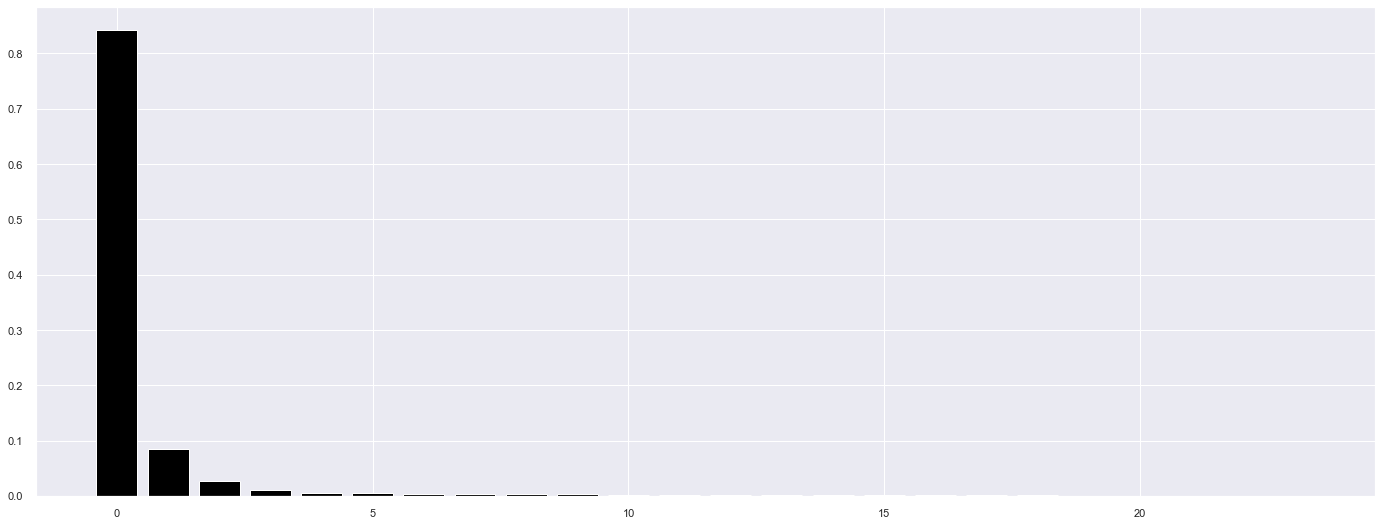

In [284]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variable
features = range( pca.n_components_ )

plt.bar( features[:100], pca.explained_variance_ratio_[:100], color='black' )

# pca component
df_pca = pd.DataFrame( principal_components )

In [285]:
dfx = pd.DataFrame([features, pca.explained_variance_ratio_])
dfx = dfx.T
dfx['sum'] = dfx.iloc[:,1].cumsum()
dfx

,0,1,sum
0,0.00,0.84,0.84
1,1.00,0.08,0.93
2,2.00,0.03,0.95
3,3.00,0.01,0.96
4,4.00,0.01,0.97
5,5.00,0.00,0.97
6,6.00,0.00,0.98
7,7.00,0.00,0.98
8,8.00,0.00,0.98
9,9.00,0.00,0.99


<AxesSubplot:xlabel='x', ylabel='y'>

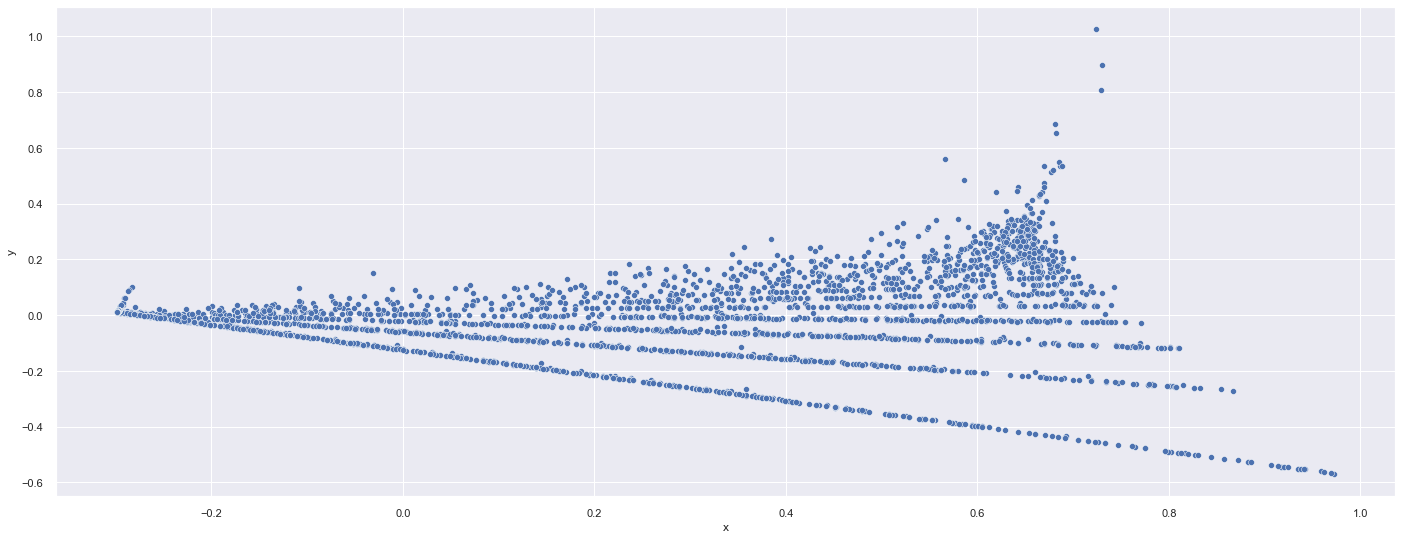

In [286]:
df_pca = df_pca.rename(columns={0:'x', 1: 'y'})
sns.scatterplot( x='x', y='y', data=df_pca)

###### UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

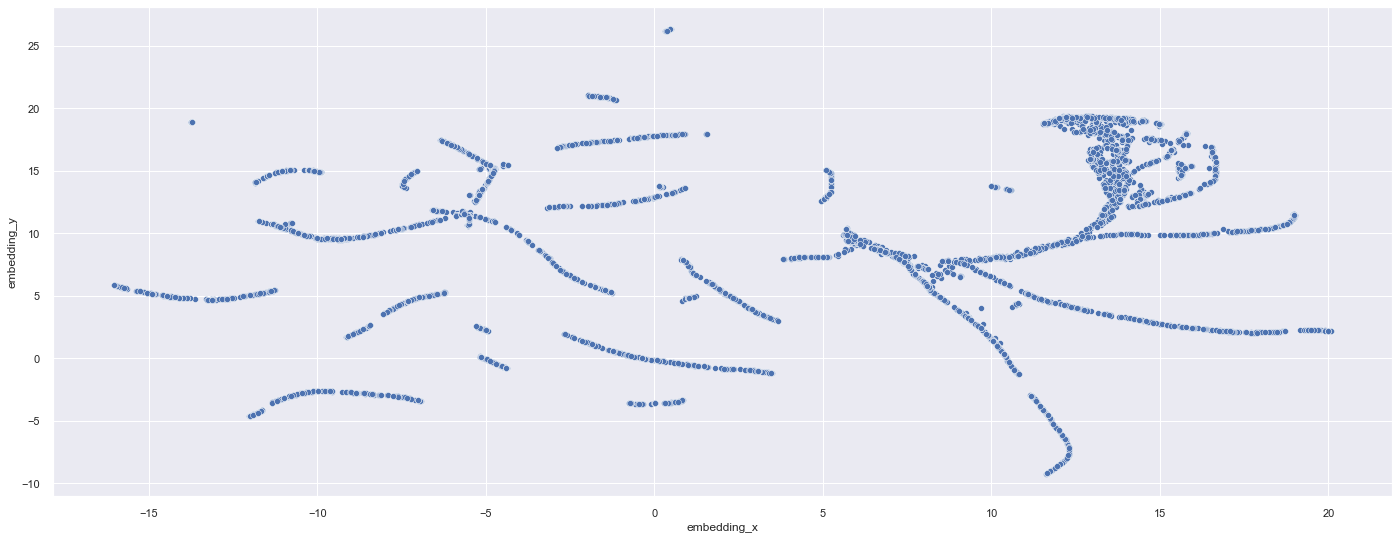

In [287]:
reducer = umap.UMAP( random_state=42, 
                     #xn_neighbors=2000,
                     #min_dist=0.1,
                     n_components=2,
                     #metric='euclidean' 
                   )
embedding = reducer.fit_transform( X )

# embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_umap )

##### t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

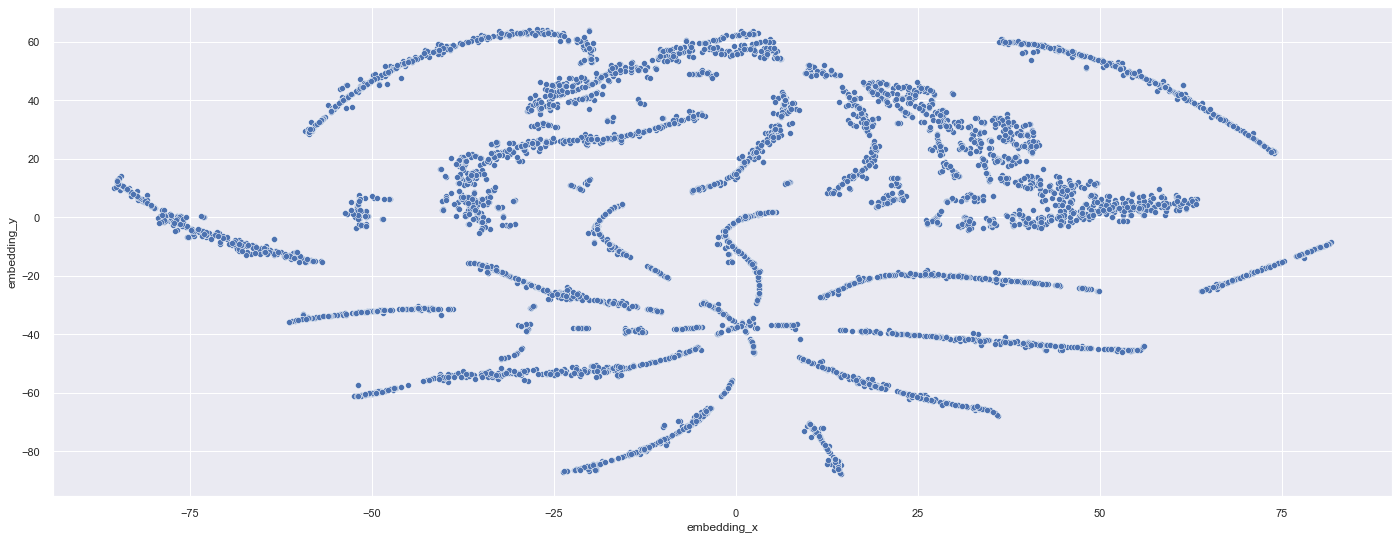

In [288]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tsne )

#### Tree-Based Embedding

In [289]:
# training dataset
X_ = X.drop( columns=['total_gross_revenue_adj'], axis=1 )
y = X['total_gross_revenue_adj']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X_, y )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [290]:
df_leaf = pd.DataFrame( rf_model.apply( X_ ) )

D:\Anaconda\programa\envs\DS_PA005\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

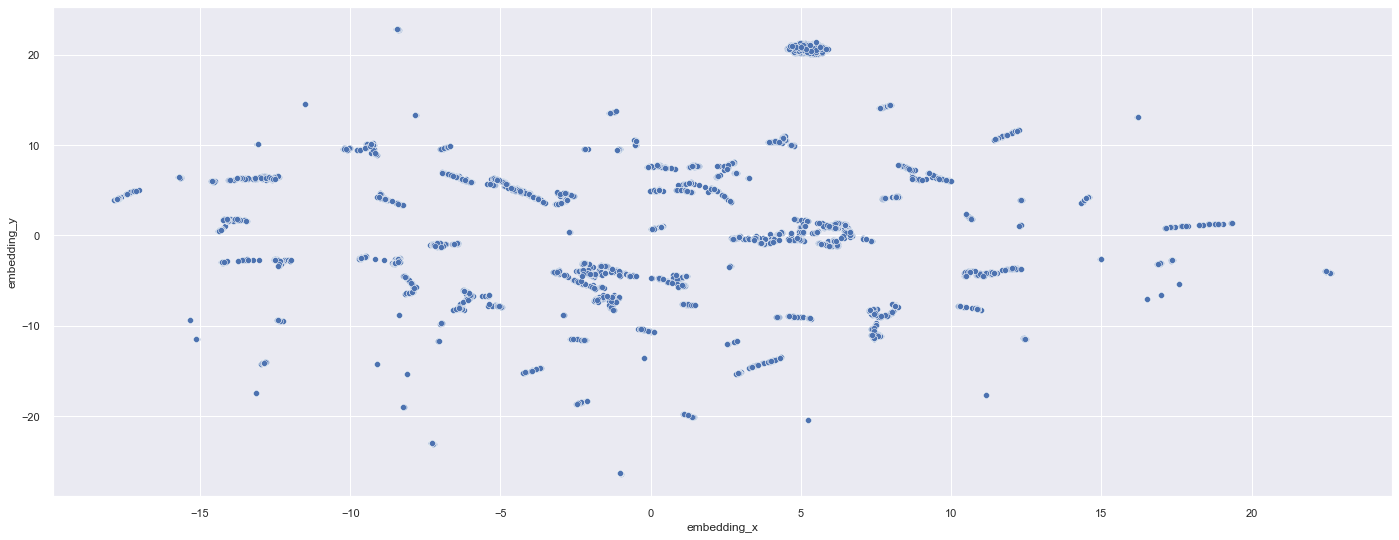

In [291]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tree )

In [244]:
df_tree.shape

(5693, 2)

# <font color='red'> 5.0. Data Preparation </font>

In [292]:
df5 = X.copy()
df5.head()

,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
1,0.01,0.01,0.01,0.00,0.00,0.03,0.02,0.00,0.00,0.03,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.02,0.98,0.28,0.00
2,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.01,0.01,0.76,0.39,0.00
3,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.16,0.00,0.01,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.15,0.04,0.00,0.70,0.13,0.00


## 5.1. NORMALIZATION

## 5.2. RESCALLING

## 5.3. TRANSFORMATION

# <font color='red'> 6.0. Feature Selection </font>

# <font color='red'> 7.0 MACHINE LEARNING MODELLING </font>

In [293]:
X = df5.copy()

In [294]:
clusters = range(2, 8)
#[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ]

In [295]:
X.shape

(5693, 24)

## 7.1. Defining the number of Clusters - K-Means

In [296]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k )

    # model training
    kmeans_model.fit( X )

    # model predict
    labels = kmeans_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    kmeans_list.append( sil )
    #print('Cluster: ', k, 'Silhoutte Score: ', sil)
    print('Cluster:', k)

Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7


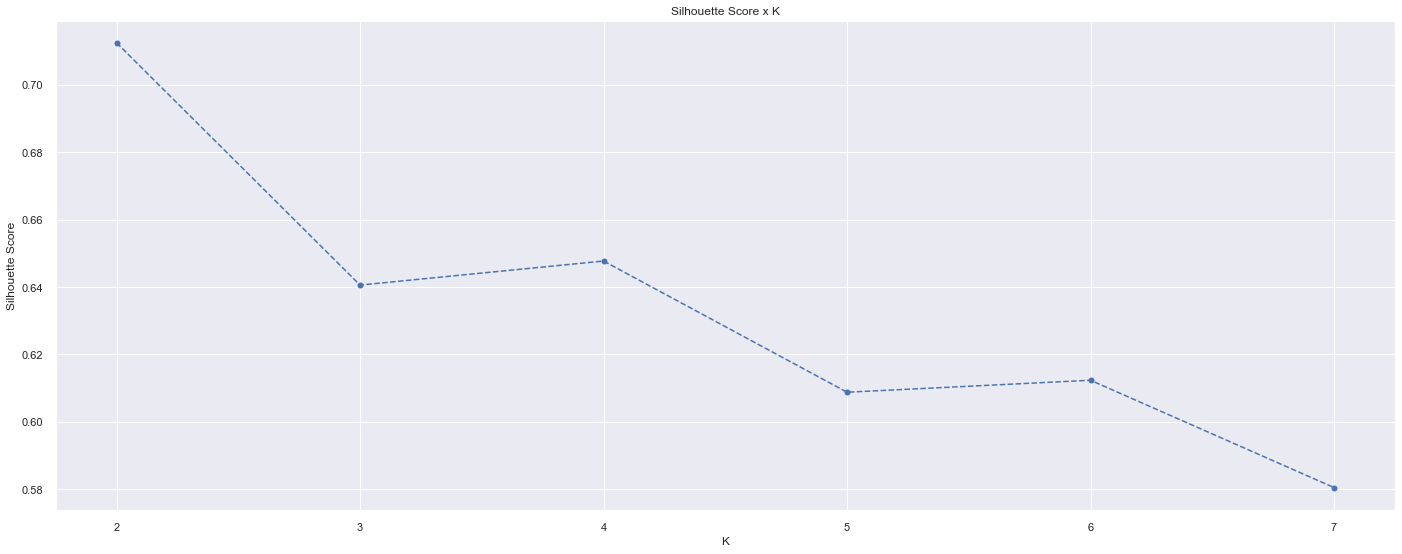

In [297]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );

## 7.2. GMM

In [298]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # model training
    gmm_model.fit( X )

    # model predict
    labels = gmm_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    gmm_list.append( sil )
    print('Cluster:', k)

Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7


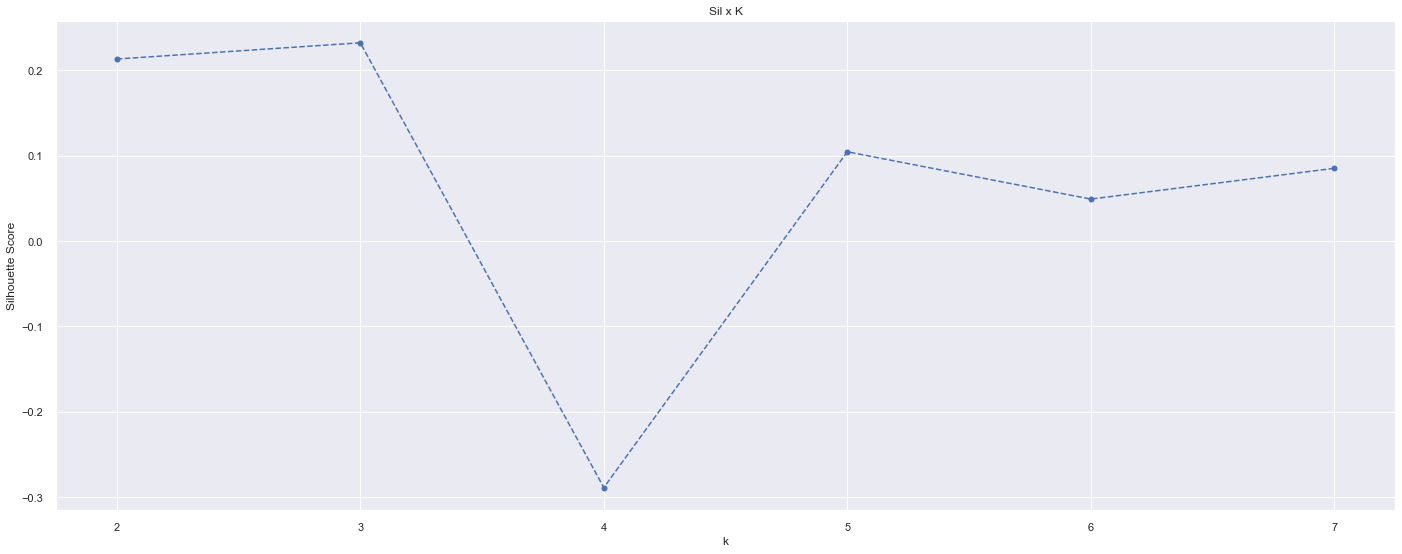

In [299]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score');
plt.title( 'Sil x K');

## 7.3. Hierarchical Clustering

In [131]:
from scipy.cluster import hierarchy as hc

In [132]:
# model definition and training
hc_model = hc.linkage( X, 'ward' )

[]

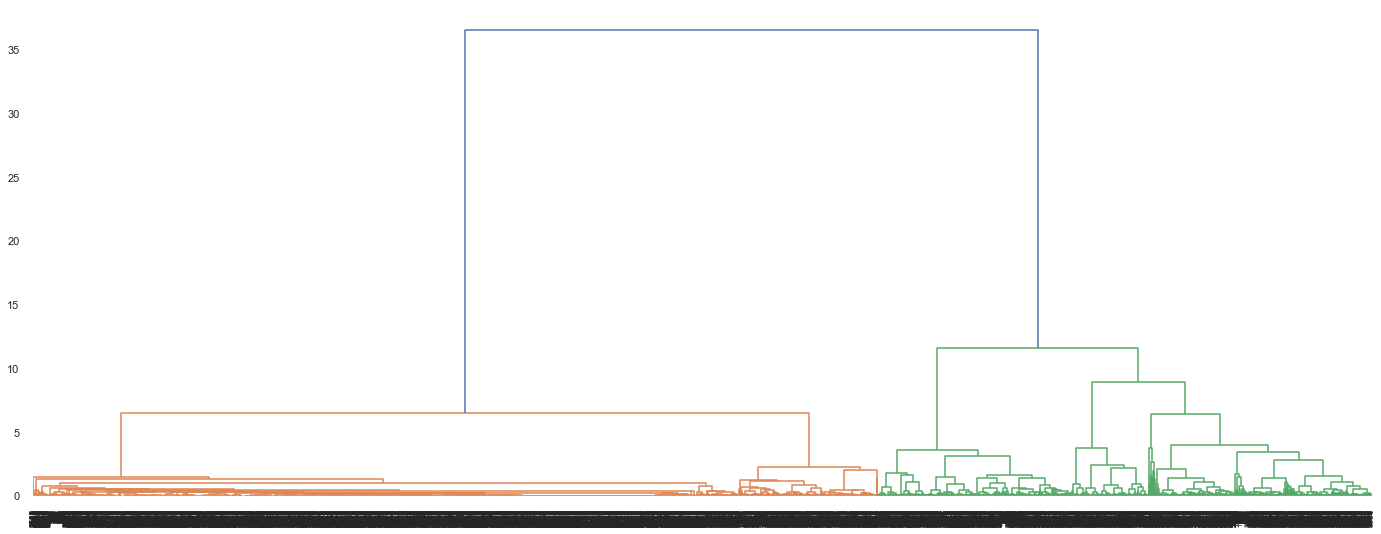

In [133]:
hc.dendrogram( 
    hc_model, 
    leaf_rotation=90,
    leaf_font_size=8
)

plt.plot()

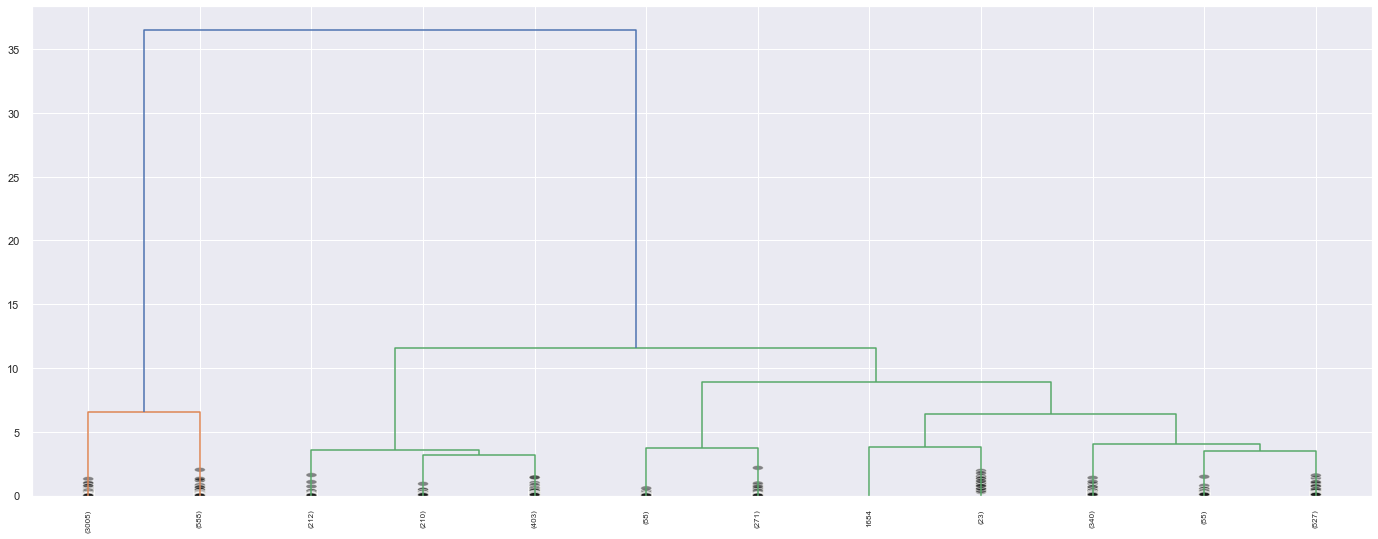

In [134]:
hc.dendrogram( 
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)

plt.show()

### 7.3.1. HClustering Silhouette Score

In [300]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # metrics
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    hc_list.append( sil )
    print('cluster', k)

cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7


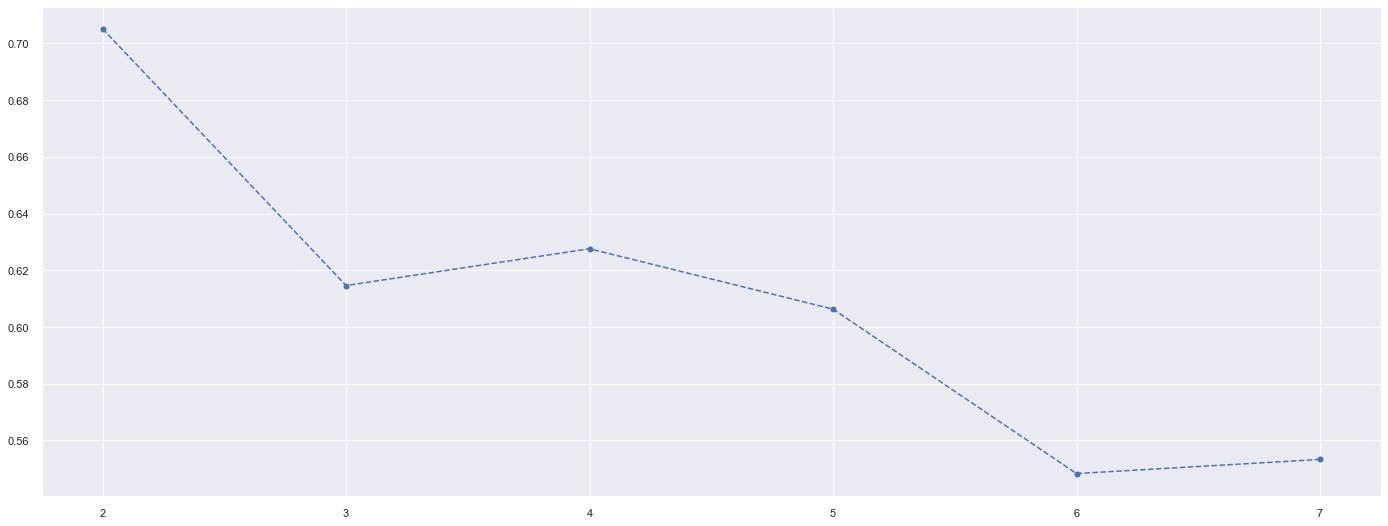

In [301]:
plt.plot( clusters,  hc_list, linestyle='--', marker='o', color='b' )

## 7.4. DBSCAN

In [119]:
eps=1.5
min_samples=10

# model definition
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples )

# mode training & predict 
labels = dbscan_model.fit_predict( X )

sil = m.silhouette_score( X, labels, metric='euclidean' )
print( 'Silhouette Score: {}'.format( sil ) )
print( 'Number of Clusters: {}'.format( len( unique( labels ) ) ) )
print( unique( labels ) )

Silhouette Score: 0.5820796489715576
Number of Clusters: 4
[0 1 2 3]


In [120]:
from sklearn.neighbors import NearestNeighbors

In [121]:
neighbors = NearestNeighbors( n_neighbors=min_samples ).fit( X )
distances, indices = neighbors.kneighbors( X )

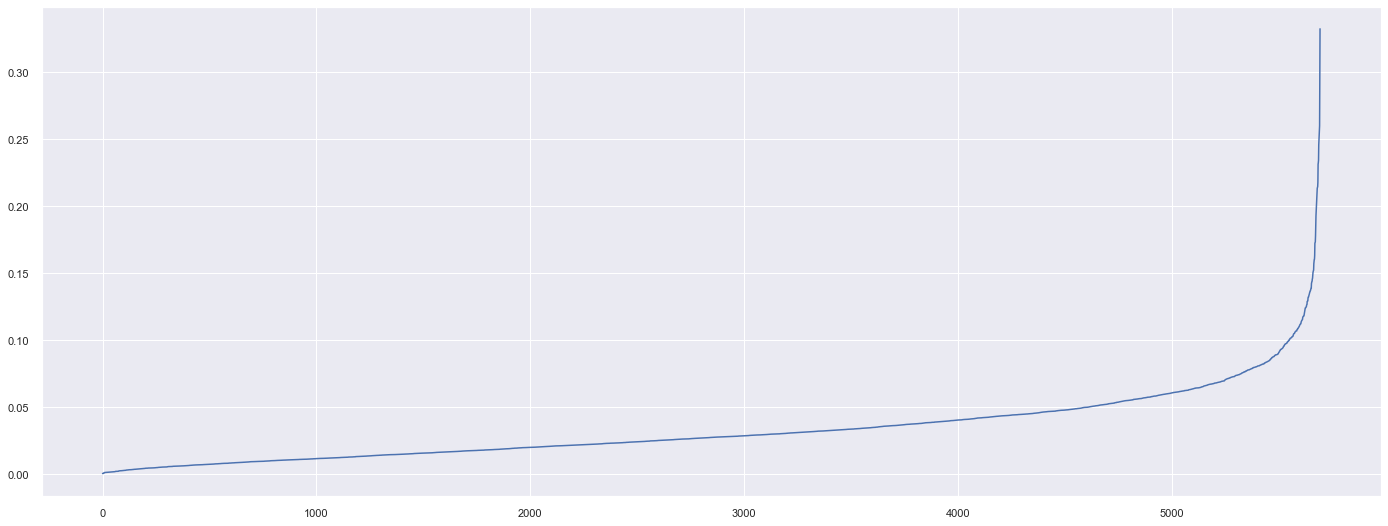

In [122]:
distances = np.sort( distances, axis=0 )
distances = distances[:,1]
plt.plot( distances )

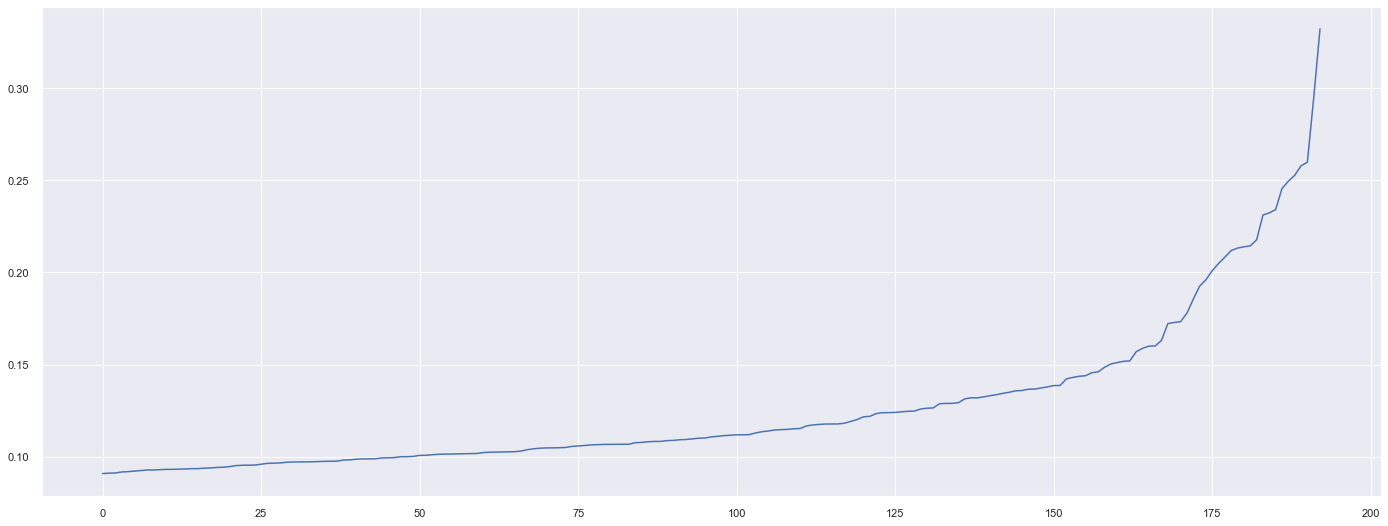

In [123]:
plt.plot( distances[5500:] )

In [38]:
dbscan_list = [ 0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 7.5. Results

In [302]:
df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list, 
     #'DBSCAN': dbscan_list
    }
).T

df_results.columns = clusters

In [303]:
df_results.style.highlight_max( color='lightgreen', axis=1 )

,2,3,4,5,6,7
KMeans,0.712433,0.640571,0.647703,0.608790,0.612338,0.580510
GMM,0.213211,0.232213,-0.288697,0.104580,0.049165,0.085236
HC,0.705157,0.614587,0.627561,0.606260,0.548263,0.553248


## 7.6. Silhouette Analysis

 For K = 2. Silhouette Score: 0.6134214997291565
 For K = 3. Silhouette Score: 0.5467432737350464
 For K = 4. Silhouette Score: 0.4574434459209442
 For K = 5. Silhouette Score: 0.45421692728996277
 For K = 6. Silhouette Score: 0.4449106454849243
 For K = 7. Silhouette Score: 0.41292959451675415


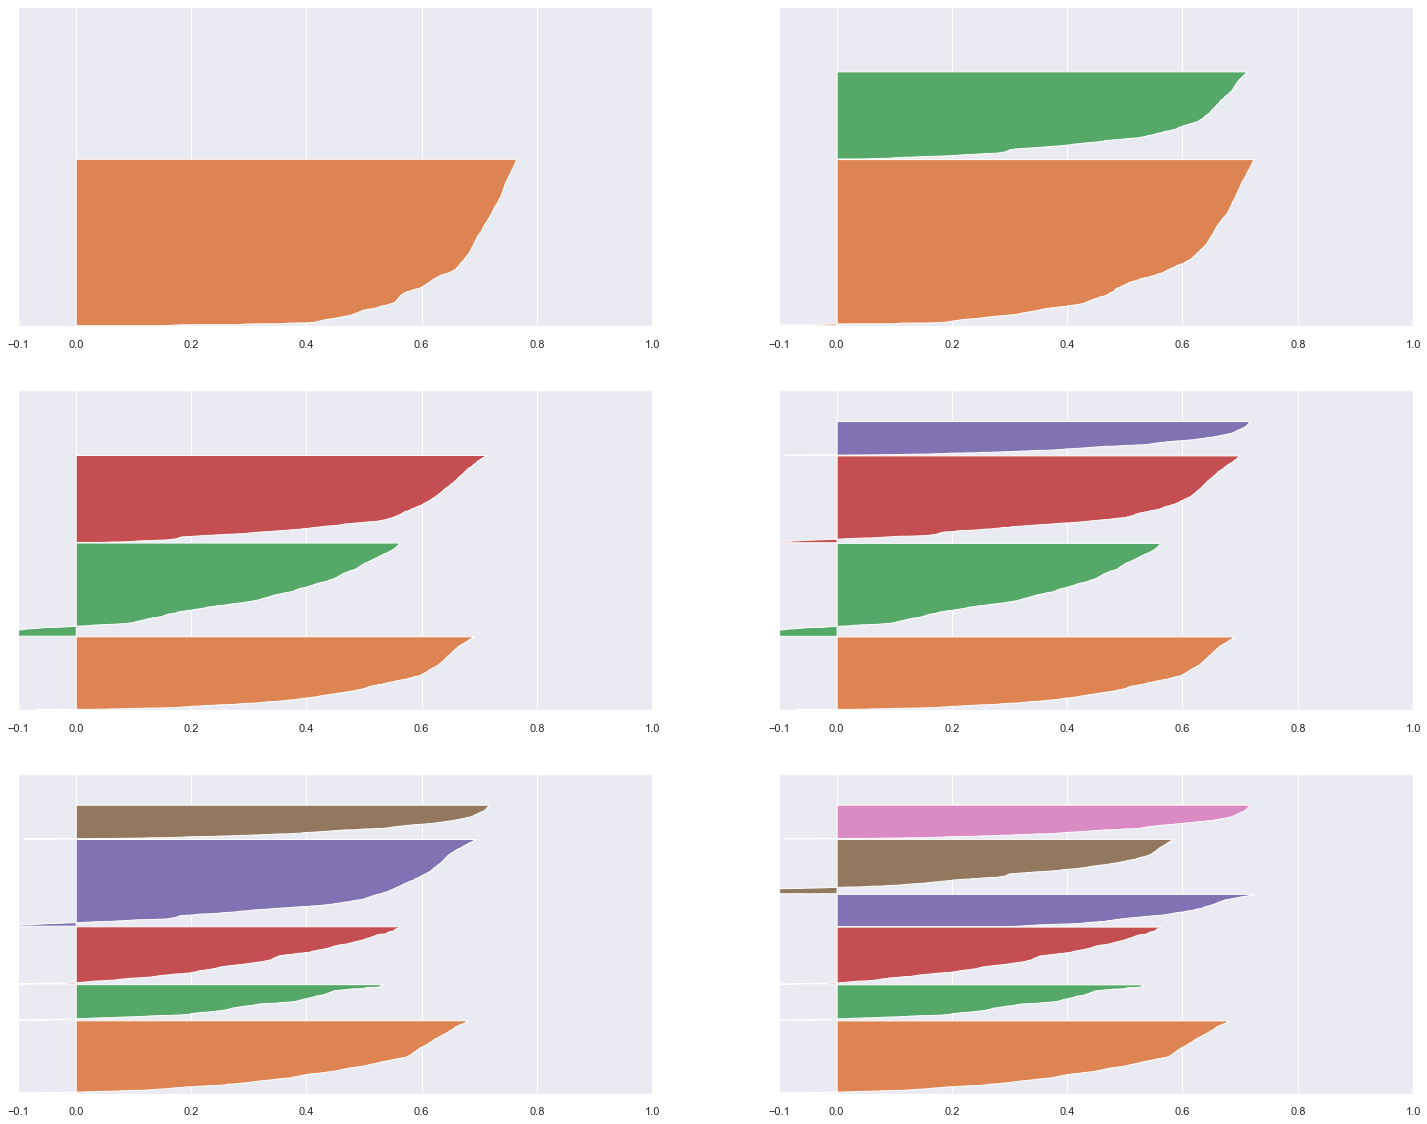

In [171]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# <font color='red'> 8.0 HYPERPARAMETER FINE TUNNING </font>

## 8.1. K-Means

In [304]:
# model definition
k = 2
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42) #max_iter iterações para achar o centróide

# model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [305]:
## WSS (within-cluster sum of square)
print('WSS Values: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)
print('SS Values: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS Values: 251.981542119162
SS Values: 0.7124330408686226


# <font color='red'> 9.0. Cluster Analysis </font>

In [306]:
df9 = df4_.copy()
df9['cluster'] = labels
df9.head()

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,cluster
1,12347,2268,160,30,0,0,711.79,475.39,0.00,0.00,636.25,0.00,382.52,584.91,0.00,0.00,1294.32,0.00,224.82,0.00,7,4310.00,365,52.14,11.81,1
2,12348,2332,0,0,0,0,652.80,187.44,0.00,0.00,327.00,0.00,0.00,0.00,0.00,270.00,0.00,0.00,0.00,360.00,4,1437.24,283,70.75,5.08,1
3,12349,545,57,24,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1442.70,0.00,300.00,1,1457.55,0,0.00,0.00,0
4,12350,196,0,0,0,0,0.00,294.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,1,294.40,0,0.00,0.00,0
5,12352,464,53,9,0,0,0.00,0.00,400.85,240.66,0.00,0.00,0.00,0.00,0.00,512.50,0.00,231.73,0.00,280.00,11,1265.41,260,23.64,4.87,1


In [143]:
df9.shape

(5693, 974)

In [188]:
X_l = X.copy()
X_l['cluster'] = labels
X_l.head()

,embedding_x,embedding_y,cluster
0,4.29,-8.16,86
1,20.95,-1.40,121
2,17.36,3.36,94
3,-5.75,16.49,103
4,17.66,1.68,24


## 9.1. Visualization Inspection

In [189]:
fig = px.scatter_3d(X_l, x='embedding_x', y='embedding_y', z='embedding_y', color='cluster')
fig.show()

## 9.2. 2d plot

D:\Anaconda\programa\envs\DS_PA005\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Anaconda\programa\envs\DS_PA005\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Anaconda\programa\envs\DS_PA005\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

D:\Anaconda\programa\envs\DS_PA005\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



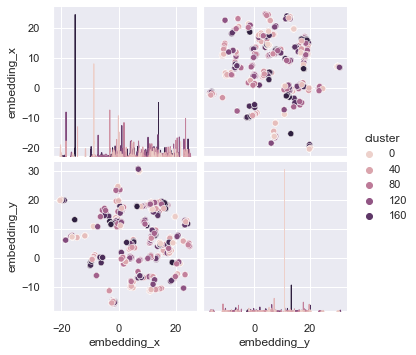

In [190]:
sns.pairplot( X_l, hue='cluster' )

## 9.1. Cluster Profile

In [258]:
df9.columns

Index(['customer_id', 'gross_revenue', 'total_returned', 'manual_p',
       'range_0_5', 'range_5_10', 'range_10_50', 'range_50_100', 'range_100',
       'm_16_12', 'm_17_01', 'm_17_02', 'm_17_03', 'm_17_04', 'm_17_05',
       'm_17_06', 'm_17_07', 'm_17_08', 'm_17_09', 'm_17_10', 'm_17_11',
       'm_17_12', 'total_postal', 'total_invoices', 'total_gross_revenue_adj',
       'date_interval', 'buy_rate', 'customer_by_day', 'cluster'],
      dtype='object')

In [307]:
df_cluster = pd.DataFrame()
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index().rename(columns={'customer_id': 'total_customers'})
df_cluster['perc_customer'] = 100*(df_cluster['total_customers'] / df_cluster['total_customers'].sum())

## Avg quantity
#df_avg_avg_qt = df9[['quantity', 'cluster']].groupby('cluster').mean().reset_index()
#df_cluster = pd.merge(df_cluster, df_avg_avg_qt, how='inner', on='cluster')

# Avg total postal
df_avg_total_postal = df9[['total_postal', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_total_postal, how='inner', on='cluster')

# Avg invoice
df_avg_invoice_no = df9[['total_invoices', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# Avg total_gross_revenue_adj
df_avg_gav_ajd = df9[['total_gross_revenue_adj', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg date_interval
df_avg_gav_ajd = df9[['date_interval', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg buy_rate
df_avg_gav_ajd = df9[['buy_rate', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg customer_by_day
df_avg_gav_ajd = df9[['customer_by_day', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

In [308]:
df_cluster.sort_values('customer_by_day', ascending=False)

,cluster,total_customers,perc_customer,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
0,0,3709,65.15,3.79,1.62,794.23,14.94,4.93,11.89
1,1,1984,34.85,25.20,8.72,3429.23,265.73,52.19,11.47


### Cluster 01:  ( Candidate for Insiders ) - NOT UPDATED
    - Number of Customers: 20 (0,35% of customers )
    - Avg Invoice: 65,35
    - Avg Gross Revenue Adjusted: $94.772,63	
        
### Cluster 02: (New customers with low invoice)
    - Number of Customers: 3704 (65,09% of customers )
    - Avg Invoice: 1,61
    - Avg Gross Revenue Adjusted: $762,10
        
### Cluster 03: (Old customers with low revenue)
    - Number of Customers: 1967 (34,56% of customers )
    - Avg Invoice: 8,08
    - Avg Gross Revenue Adjusted: $2.580,80

In [259]:
df9[df9['cluster'] == 0].sort_values('customer_by_day', ascending=False).head(50)

,customer_id,gross_revenue,total_returned,manual_p,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,cluster
4250,18139,8438.34,0.00,0.00,5257,300,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8438.34,0.00,0.00,8,8393.22,1,0.12,8393.22,0
3422,16986,1873.20,0.00,0.00,1040,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1873.20,0.00,0.00,2,1873.20,1,0.50,1873.20,0
3790,17509,6115.14,-14.40,0.00,3408,126,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6115.14,0.00,0.00,0.00,11,6100.74,6,0.55,1016.79,0
4246,18133,931.50,0.00,0.00,1350,0,0,0,0,0.00,0.00,0.00,0.00,0.00,931.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,715.50,1,0.50,715.50,0
2478,15700,696.68,-32.65,0.00,336,20,1,0,0,0.00,0.00,0.00,0.00,0.00,0.00,696.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,664.03,1,0.33,664.03,0
1877,14893,1237.85,0.00,0.00,770,25,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1237.85,0.00,0.00,2,1237.85,2,1.00,618.93,0
2204,15332,1661.06,0.00,0.00,574,78,0,0,0,1661.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,1661.06,3,0.75,553.69,0
1296,14096,53233.47,0.00,0.00,15506,660,169,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.43,7496.27,15705.57,22622.44,7311.76,0.00,18,53147.98,97,5.39,547.92,0
3705,17391,508.80,0.00,0.00,480,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,508.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,508.80,1,0.50,508.80,0
196,12590,9341.26,-2.88,0.00,3786,496,0,0,0,0.00,0.00,0.00,0.00,0.00,9341.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,9338.38,21,10.50,444.68,0


In [151]:
df9[df9['cluster'] == 1].sort_values('total_gross_revenue_adj', ascending=False).head(10)

customer_id  quantity  unit_price  total_returned  manual_p  class_0  class_1  class_2  class_3  class_4  class_5  class_6  class_7  class_8  class_9  class_10  class_11  class_12  class_13  class_14  class_15  class_16  class_17  class_18  class_19  class_20  class_21  class_22  class_23  class_24  class_25  class_26  class_27  class_28  class_29  class_30  class_31  class_32  class_33  class_34  class_35  class_36  class_37  class_38  class_39  class_40  class_41  class_42  class_43  class_44  class_45  class_46  class_47  class_48  class_49  class_50  class_51  class_52  class_53  class_54  class_55  class_56  class_57  class_58  class_59  class_60  class_61  class_62  class_63  class_64  class_65  class_66  class_67  class_68  class_69  class_70  class_71  class_72  class_73  class_74  class_75  class_76  class_77  class_78  class_79  class_80  class_81  class_82  class_83  class_84  class_85  class_86  class_87  class_88  class_89  class_90  class_91  class_92  class_93  class_94  class_95  class_96  class_97  class_98  class_99  class_100  class_101  class_102  class_103  class_104  class_105  class_106  class_107  class_108  class_109  class_110  class_111  class_112  class_113  class_114  class_115  class_116  class_117  class_118  class_119  class_120  class_121  class_122  class_123  class_124  class_125  class_126  class_127  class_128  class_129  class_130  class_131  class_132  class_133  class_134  class_135  class_136  class_137  class_138  class_139  class_140  class_141  class_142  class_143  class_144  class_145  class_146  class_147  class_148  class_149  class_150  class_151  class_152  class_153  class_154  class_155  class_156  class_157  class_158  class_159  class_160  class_161  class_162  class_163  class_164  class_165  class_166  class_167  class_168  class_169  class_170  class_171  class_172  class_173  class_174  class_175  class_176  class_177  class_178  class_179  class_180  class_181  class_182  class_183  class_184  class_185  class_186  class_187  class_188  class_189  class_190  class_191  class_192  class_193  class_194  class_195  class_196  class_197  class_198  class_199  class_200  class_201  class_202  class_203  class_204  class_205  class_206  class_207  class_208  class_209  class_210  class_211  class_212  class_213  class_214  class_215  class_216  class_217  class_218  class_219  class_220  class_221  class_222  class_223  class_224  class_225  class_226  class_227  class_228  class_229  class_230  class_231  class_232  class_233  class_234  class_235  class_236  class_237  class_238  class_239  class_240  class_241  class_242  class_243  class_244  class_245  class_246  class_247  class_248  class_249  class_250  class_251  class_252  class_253  class_254  class_255  class_256  class_257  class_258  class_259  class_260  class_261  class_262  class_263  class_264  class_265  class_266  class_267  class_268  class_269  class_270  class_271  class_272  class_273  class_274  class_275  class_276  class_277  class_278  class_279  class_280  class_281  class_282  class_283  class_284  class_285  class_286  class_287  class_288  class_289  class_290  class_291  class_292  class_293  class_294  class_295  class_296  class_297  class_298  class_299  class_300  class_301  class_302  class_303  class_304  class_305  class_306  class_307  class_308  class_309  class_310  class_311  class_312  class_313  class_314  class_315  class_316  class_317  class_318  class_319  class_320  class_321  class_322  class_323  class_324  class_325  class_326  class_327  class_328  class_329  class_330  class_331  class_332  class_333  class_334  class_335  class_336  class_337  class_338  class_339  class_340  class_341  class_342  class_343  class_344  class_345  class_346  class_347  class_348  class_349  class_350  class_351  class_352  class_353  class_354  class_355  class_356  class_357  class_358  class_359  class_360  class_361  class_362  class_363  class_364  class_365  class_366  class_367  c

In [241]:
df2[df2['customer_id'] == 18102]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,good_return,qtd_adjustment,free_purchase,normal_purchase
16418,537657,82484,408,2016-12-05,4.78,United Kingdom,WOOD BLACK BOARD ANT WHITE FINISH,18102,1950.24,0,0,0,1
16419,537657,22830,30,2016-12-05,19.84,United Kingdom,UTILTY CABINET WITH HOOKS,18102,595.20,0,0,0,1
16420,537657,22189,972,2016-12-05,2.31,United Kingdom,CREAM HEART CARD HOLDER,18102,2245.32,0,0,0,1
16421,537657,22188,972,2016-12-05,2.31,United Kingdom,BLACK HEART CARD HOLDER,18102,2245.32,0,0,0,1
16422,537657,21623,408,2016-12-05,6.38,United Kingdom,VINTAGE UNION JACK MEMOBOARD,18102,2603.04,0,0,0,1
16423,537658,82484,48,2016-12-05,4.78,United Kingdom,WOOD BLACK BOARD ANT WHITE FINISH,18102,229.44,0,0,0,1
16424,537658,22189,36,2016-12-05,2.31,United Kingdom,CREAM HEART CARD HOLDER,18102,83.16,0,0,0,1
16425,537658,22188,36,2016-12-05,2.31,United Kingdom,BLACK HEART CARD HOLDER,18102,83.16,0,0,0,1
16426,537659,22765,23,2016-12-05,9.89,United Kingdom,NEWSPAPER STAND,18102,227.47,0,0,0,1
16427,537659,22507,208,2016-12-05,3.86,United Kingdom,MEMO BOARD RETROSPOT DESIGN,18102,802.88,0,0,0,1


# <font color='red'> 10.0. Deploy To Production </font>